# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180) 

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
cities_data = []
cities_name = []
cities_lat = []
cities_lng = []
cities_max = []
cities_hum = []
cities_cloud = []
cities_wind = []
cities_country = []
cities_date = []

for city in cities:
    try:
        response = requests.get(f"{url}q={city}&appid={weather_api_key}&units=imperial").json()
        cities_name.append(response["name"])
        cities_lat.append(response["coord"]["lat"])
        cities_lng.append(response["coord"]["lon"])
        cities_max.append(response["main"]["temp_max"])
        cities_hum.append(response["main"]["humidity"])
        cities_cloud.append(response["clouds"]["all"])
        cities_wind.append(response["wind"]["speed"])
        cities_country.append(response["sys"]["country"])
        cities_date.append(response["dt"])
        cities_data.append(response)
        print(f"Processing record {cities_data.index(response) + 1} of Set | {city}")
    except:
        print(f"City not found. Skipping...")

City not found. Skipping...
Processing record 1 of Set | hay river
Processing record 2 of Set | faanui
Processing record 3 of Set | constitucion
City not found. Skipping...
Processing record 4 of Set | busselton
Processing record 5 of Set | kavieng
Processing record 6 of Set | rikitea
Processing record 7 of Set | albany
Processing record 8 of Set | new norfolk
Processing record 9 of Set | florence
Processing record 10 of Set | kapaa
Processing record 11 of Set | georgetown
Processing record 12 of Set | makakilo city
City not found. Skipping...
Processing record 13 of Set | vagur
Processing record 14 of Set | kita
Processing record 15 of Set | ponta do sol
Processing record 16 of Set | hobart
Processing record 17 of Set | sao filipe
Processing record 18 of Set | salalah
Processing record 19 of Set | barrow
Processing record 20 of Set | punta arenas
Processing record 21 of Set | beisfjord
Processing record 22 of Set | thompson
Processing record 23 of Set | carnarvon
Processing record 24 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_df = pd.DataFrame({
        "City": cities_name,
        "Lat": cities_lat,
        "Lng": cities_lng,
        "Max Temp": cities_max,
        "Humidity": cities_hum,
        "Cloudiness": cities_cloud,
        "Wind Speed": cities_wind,
        "Country": cities_country,
        "Date": cities_date
})

cities_df.to_csv("./Cities_Weather_Data.csv", index=False, header=True)

cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hay River,60.8156,-115.7999,24.80,68,100,3.44,CA,1616139753
1,Faanui,-16.4833,-151.7500,82.38,66,2,5.30,PF,1616139753
2,Constitución,-35.3333,-72.4167,51.48,86,0,3.71,CL,1616139656
3,Busselton,-33.6500,115.3333,91.99,24,98,1.99,AU,1616139699
4,Kavieng,-2.5744,150.7967,83.77,73,90,6.96,PG,1616139754
...,...,...,...,...,...,...,...,...,...
563,Teguise,29.0605,-13.5640,62.60,72,20,10.36,ES,1616139909
564,Hampton,37.0299,-76.3452,48.99,100,90,16.11,US,1616139909
565,Oga,46.4631,10.3470,41.00,85,40,2.13,IT,1616139909
566,Rovaniemi,66.5000,25.7167,10.40,85,0,4.61,FI,1616139910


In [5]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,19.660631,20.192589,55.755370,71.184859,53.271127,8.152570,1.616140e+09
std,33.547267,92.093491,27.577208,20.957738,39.807700,5.584403,8.552840e+01
min,-54.800000,-179.166700,-27.810000,8.000000,0.000000,0.560000,1.616139e+09
25%,-8.675550,-61.911100,35.600000,60.000000,4.000000,3.995000,1.616140e+09
50%,22.157300,25.341850,62.600000,75.000000,62.500000,6.910000,1.616140e+09
75%,48.392750,102.696575,78.587500,87.000000,91.000000,11.345000,1.616140e+09
max,78.218600,178.416700,103.480000,100.000000,100.000000,31.070000,1.616140e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

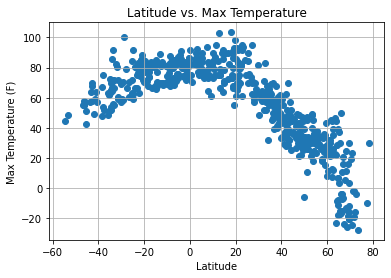

<Figure size 432x288 with 0 Axes>

In [8]:
plt.scatter(cities_df["Lat"],cities_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Max Temperature")
plt.grid()

plt.show()

plt.savefig('LatVMaxTemp.png')

## Latitude vs. Humidity Plot

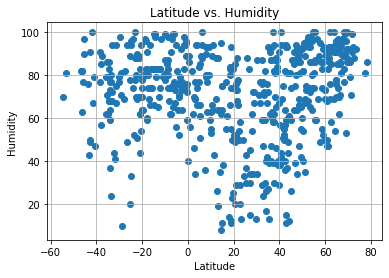

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(cities_df["Lat"],cities_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
plt.grid()

plt.show()

plt.savefig('LatVHum.png')

## Latitude vs. Cloudiness Plot

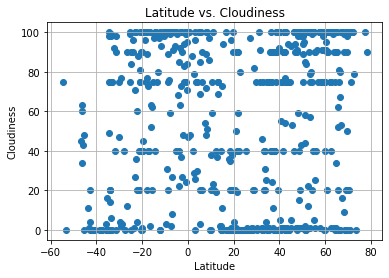

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(cities_df["Lat"],cities_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.grid()

plt.show()

plt.savefig('LatVCloud.png')

## Latitude vs. Wind Speed Plot

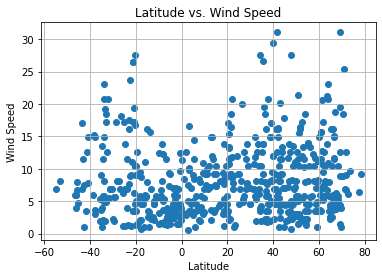

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(cities_df["Lat"],cities_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.grid()

plt.show()

plt.savefig('LatVWind.png')

## Linear Regression

In [12]:
north_df = cities_df.loc[cities_df["Lat"] > 0]
south_df = cities_df.loc[cities_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -1.31x + 98.78
The r-value is: -0.8915632067254562


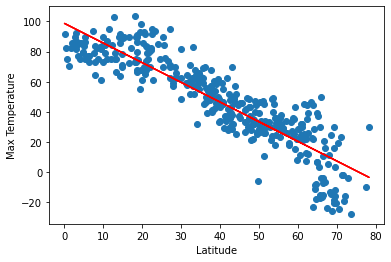

In [13]:
plt.scatter(north_df["Lat"],north_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

(slope, intercept, r, p, std) = linregress(north_df["Lat"],north_df["Max Temp"])
regress_values = north_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_df["Lat"],regress_values,"r-")
print(line_eq)
print(f"The r-value is: {r}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.54x + 84.36
The r-value is: 0.6525593290252962


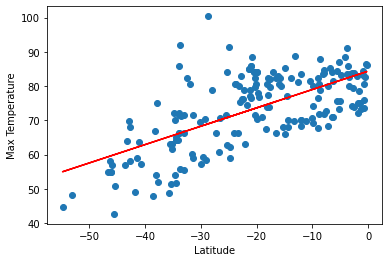

In [14]:
plt.scatter(south_df["Lat"],south_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

(slope, intercept, r, p, std) = linregress(south_df["Lat"],south_df["Max Temp"])
regress_values = south_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_df["Lat"],regress_values,"r-")
print(line_eq)
print(f"The r-value is: {r}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.37x + 54.11
The r-value is: 0.32585553051777977


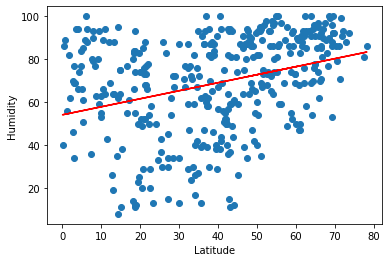

In [15]:
plt.scatter(north_df["Lat"],north_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, r, p, std) = linregress(north_df["Lat"],north_df["Humidity"])
regress_values = north_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_df["Lat"],regress_values,"r-")
print(line_eq)
print(f"The r-value is: {r}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.21x + 80.19
The r-value is: 0.18165254646818516


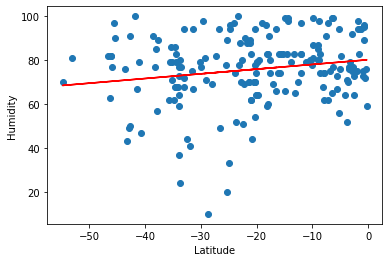

In [16]:
plt.scatter(south_df["Lat"],south_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, r, p, std) = linregress(south_df["Lat"],south_df["Humidity"])
regress_values = south_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_df["Lat"],regress_values,"r-")
print(line_eq)
print(f"The r-value is: {r}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.37x + 36.99
The r-value is: 0.18325519281572805


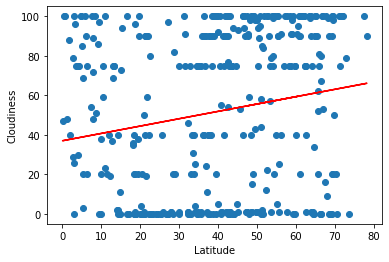

In [17]:
plt.scatter(north_df["Lat"],north_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, r, p, std) = linregress(north_df["Lat"],north_df["Cloudiness"])
regress_values = north_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_df["Lat"],regress_values,"r-")
print(line_eq)
print(f"The r-value is: {r}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 1.35x + 84.16
The r-value is: 0.4664349431663815


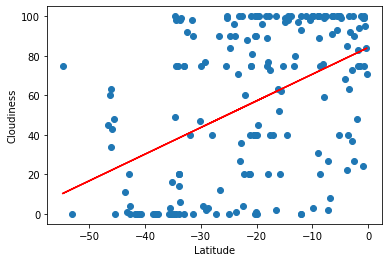

In [18]:
plt.scatter(south_df["Lat"],south_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, r, p, std) = linregress(south_df["Lat"],south_df["Cloudiness"])
regress_values = south_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_df["Lat"],regress_values,"r-")
print(line_eq)
print(f"The r-value is: {r}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.03x + 7.39
The r-value is: 0.10318673937521088


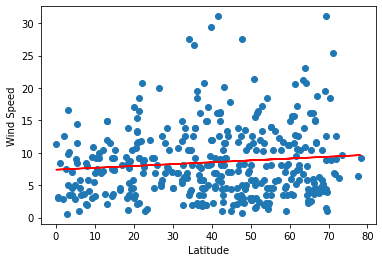

In [19]:
plt.scatter(north_df["Lat"],north_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(slope, intercept, r, p, std) = linregress(north_df["Lat"],north_df["Wind Speed"])
regress_values = north_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_df["Lat"],regress_values,"r-")
print(line_eq)
print(f"The r-value is: {r}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.1x + 5.38
The r-value is: -0.23275711842486438


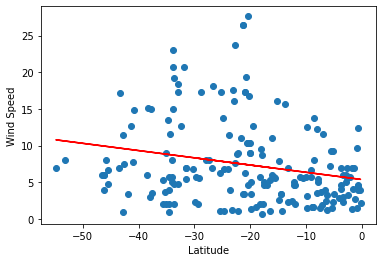

In [20]:
plt.scatter(south_df["Lat"],south_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(slope, intercept, r, p, std) = linregress(south_df["Lat"],south_df["Wind Speed"])
regress_values = south_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_df["Lat"],regress_values,"r-")
print(line_eq)
print(f"The r-value is: {r}")

plt.show()